In [1]:
# Importing all important Libraries

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.preprocessing import LabelEncoder

import json

import pickle

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Problem Statement :

## Data Gathering :

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


## Exploratory data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 8)

In [6]:
df.nunique()

Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

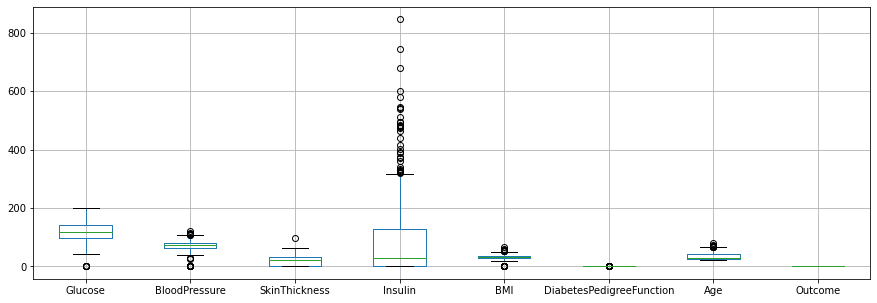

In [14]:
plt.figure(figsize=(15,5))
df.boxplot()

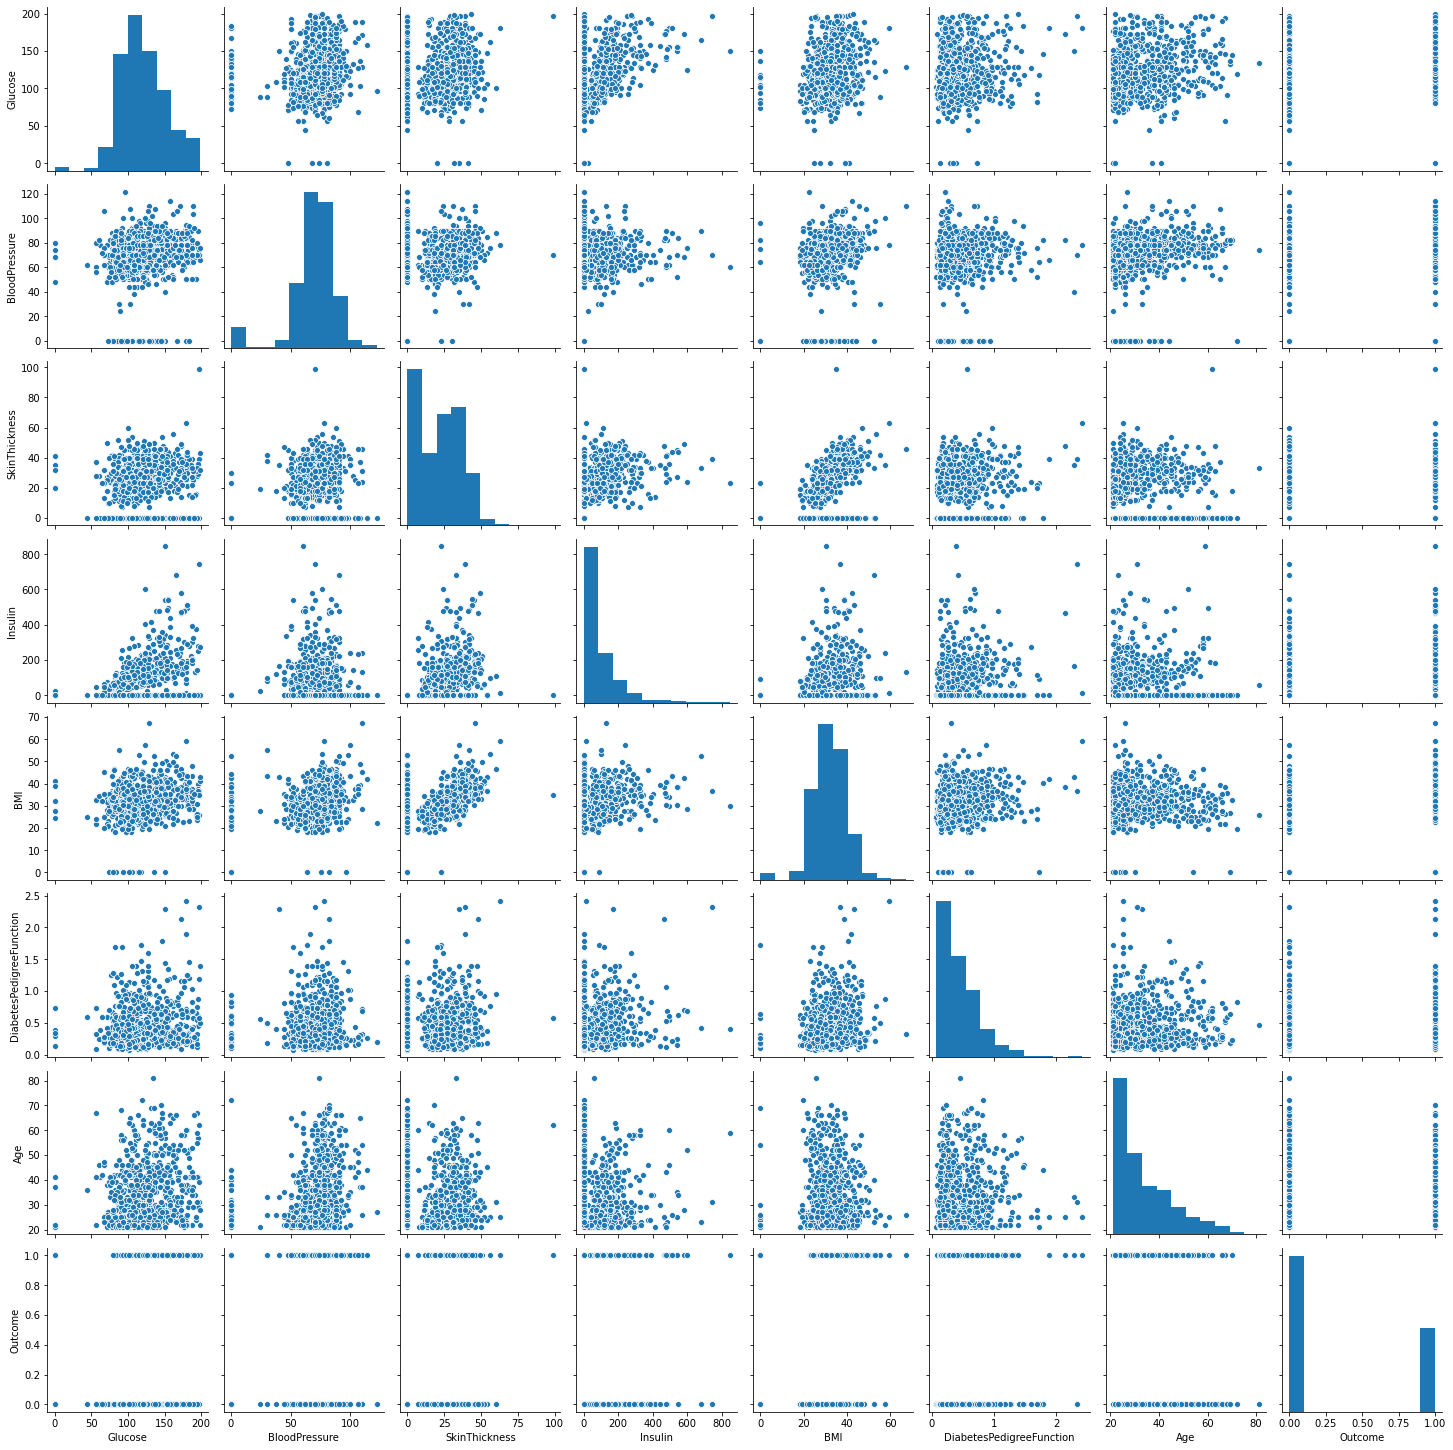

In [15]:
sns.pairplot(df)

## Feature Engineering :

## 1. Glucose

In [17]:
df['Glucose'].unique()

array([148,  85, 183, 150, 100, 118, 107, 103, 115, 126,  99, 196, 119,
       143, 125, 147,  97, 145, 117, 109, 158,  88,  92, 122, 138, 102,
        90, 111, 180, 133, 106, 171, 159, 146,  71, 105, 101, 176,  73,
       187,  84,  44, 141, 114,  95, 139, 129,  79,   0,  62, 131, 112,
       113,  74,  83, 137, 110, 136,  80, 123,  81, 134, 142, 144,  93,
       163, 151,  96, 155,  89,  76, 160, 124,  78, 162, 132, 120, 173,
       170, 128, 108, 154,  57, 156, 153, 188, 152, 104,  87,  75, 179,
       130, 194, 181, 135, 184, 140, 177, 197, 164,  91, 165,  86, 193,
       191, 161, 167,  77, 182, 157, 178, 116,  61, 189,  98, 166, 127,
        82,  72, 168, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

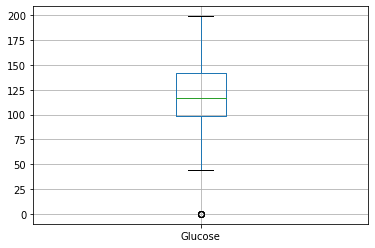

In [18]:
df[['Glucose']].boxplot()

In [19]:
df['Glucose'].isna().sum()

0

In [20]:
q1 = df['Glucose'].quantile(0.25)

q2 = df['Glucose'].quantile(0.50)

q3 = df['Glucose'].quantile(0.75)

IQR = q3 - q1

m = df['Glucose'].median()

upper_tail = q3 + 1.5 * IQR

lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

206.5
34.5


In [22]:
df['Glucose'].loc[df['Glucose']<lower_tail]

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [23]:
df['Glucose'].loc[df['Glucose']<lower_tail]=lower_tail

In [24]:
df['Glucose'].loc[df['Glucose']<lower_tail]

Series([], Name: Glucose, dtype: float64)

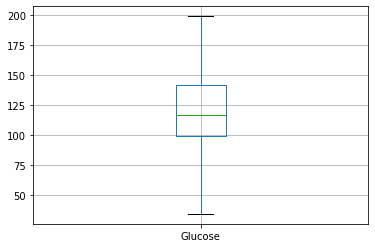

In [25]:
df[['Glucose']].boxplot()

## 2. BloodPressure

In [26]:
df['BloodPressure'].unique()

array([ 50,  66,  64,  40,  74,   0,  70,  96,  92,  80,  60,  72,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

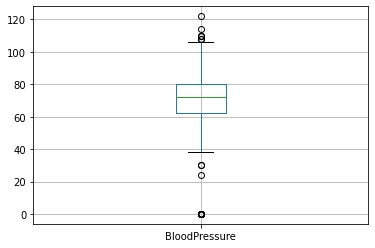

In [27]:
df[['BloodPressure']].boxplot()

In [28]:
df['BloodPressure'].isna().sum()

0

In [29]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(0.75)

IQR = q3 - q1
m = df['BloodPressure'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

107.0
35.0


In [30]:
df['BloodPressure'].loc[df['BloodPressure']>upper_tail]

43     110
84     108
106    122
177    110
362    108
549    110
691    114
Name: BloodPressure, dtype: int64

In [31]:
df['BloodPressure'].loc[df['BloodPressure']>upper_tail]=upper_tail

In [32]:
df['BloodPressure'].loc[df['BloodPressure']>upper_tail]

Series([], Name: BloodPressure, dtype: float64)

In [34]:
df['BloodPressure'].loc[df['BloodPressure']<lower_tail]

7       0.0
15      0.0
18     30.0
49      0.0
60      0.0
78      0.0
81      0.0
125    30.0
172     0.0
193     0.0
222     0.0
261     0.0
266     0.0
269     0.0
300     0.0
332     0.0
336     0.0
347     0.0
357     0.0
426     0.0
430     0.0
435     0.0
453     0.0
468     0.0
484     0.0
494     0.0
522     0.0
533     0.0
535     0.0
589     0.0
597    24.0
601     0.0
604     0.0
619     0.0
643     0.0
697     0.0
703     0.0
706     0.0
Name: BloodPressure, dtype: float64

In [36]:
df['BloodPressure'].loc[df['BloodPressure']<lower_tail]=lower_tail

In [37]:
df['BloodPressure'].loc[df['BloodPressure']<lower_tail]

Series([], Name: BloodPressure, dtype: float64)

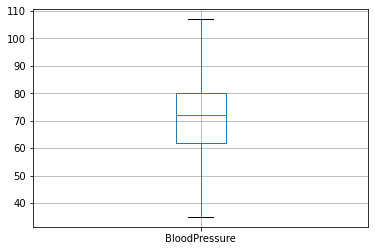

In [38]:
df[['BloodPressure']].boxplot()

## 3. SkinThickness

In [39]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

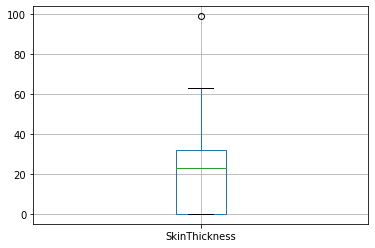

In [40]:
df[['SkinThickness']].boxplot()

In [41]:
q1 = df['SkinThickness'].quantile(0.25)
q2 = df['SkinThickness'].quantile(0.50)
q3 = df['SkinThickness'].quantile(0.75)

IQR = q3 - q1

m = df['SkinThickness'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

80.0
-48.0


In [42]:
df['SkinThickness'].loc[df['SkinThickness']>upper_tail]

579    99
Name: SkinThickness, dtype: int64

In [43]:
df['SkinThickness'].loc[df['SkinThickness']>upper_tail]=upper_tail

In [44]:
df['SkinThickness'].loc[df['SkinThickness']>upper_tail]

Series([], Name: SkinThickness, dtype: float64)

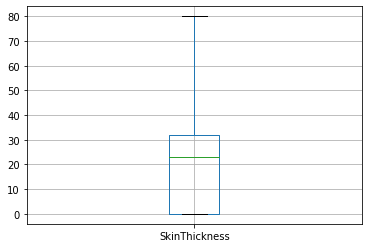

In [45]:
df[['SkinThickness']].boxplot()

## 4. Insulin

In [46]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

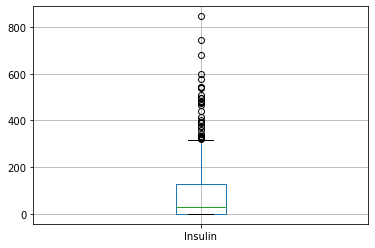

In [47]:
df[['Insulin']].boxplot()

In [49]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)

IQR = q3 - q1

m = df['Insulin'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

318.125
-190.875


In [50]:
df['Insulin'].loc[df['Insulin']>upper_tail]

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [52]:
df['Insulin'].loc[df['Insulin']>upper_tail]=upper_tail

In [53]:
df['Insulin'].loc[df['Insulin']>upper_tail]

Series([], Name: Insulin, dtype: float64)

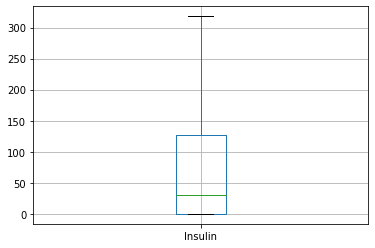

In [54]:
df[['Insulin']].boxplot()

## 5. BMI

In [55]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

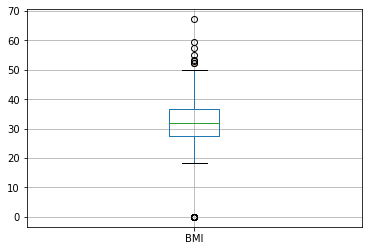

In [56]:
df[['BMI']].boxplot()

In [57]:
q1 = df['BMI'].quantile(0.25)
q2 = df['BMI'].quantile(0.50)
q3 = df['BMI'].quantile(0.75)

IQR = q3 - q1
m = df['BMI'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

50.550000000000004
13.35


In [58]:
df['BMI'].loc[df['BMI']>upper_tail]

120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64

In [59]:
df['BMI'].loc[df['BMI']>upper_tail]=upper_tail

In [60]:
df['BMI'].loc[df['BMI']>upper_tail]

Series([], Name: BMI, dtype: float64)

In [62]:
df['BMI'].loc[df['BMI']<lower_tail]

9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64

In [63]:
df['BMI'].loc[df['BMI']<lower_tail]=lower_tail

In [64]:
df['BMI'].loc[df['BMI']<lower_tail]

Series([], Name: BMI, dtype: float64)

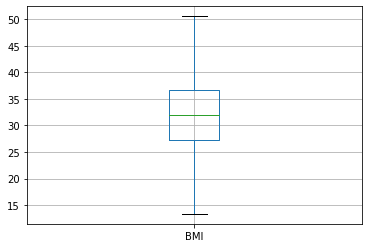

In [65]:
df[['BMI']].boxplot()

## 6. DiabetesPedigreeFunction

In [66]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

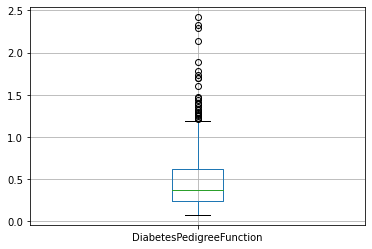

In [67]:
df[['DiabetesPedigreeFunction']].boxplot()

In [68]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

IQR = q3 - q1
m = df['DiabetesPedigreeFunction'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

1.2
-0.32999999999999996


In [69]:
df['DiabetesPedigreeFunction'].loc[df['DiabetesPedigreeFunction']>upper_tail]

4      2.288
12     1.441
39     1.390
45     1.893
58     1.781
100    1.222
147    1.400
187    1.321
218    1.224
228    2.329
243    1.318
245    1.213
259    1.353
292    1.224
308    1.391
330    1.476
370    2.137
371    1.731
383    1.268
395    1.600
445    2.420
534    1.251
593    1.699
606    1.258
618    1.282
621    1.698
622    1.461
659    1.292
661    1.394
Name: DiabetesPedigreeFunction, dtype: float64

In [70]:
df['DiabetesPedigreeFunction'].loc[df['DiabetesPedigreeFunction']>upper_tail]=upper_tail

In [71]:
df['DiabetesPedigreeFunction'].loc[df['DiabetesPedigreeFunction']>upper_tail]

Series([], Name: DiabetesPedigreeFunction, dtype: float64)

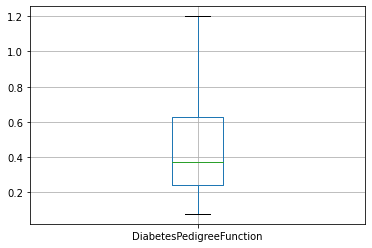

In [72]:
df[['DiabetesPedigreeFunction']].boxplot()

## 7. Age

In [73]:
df['Age'].unique()

array([50, 31, 52, 21, 33, 30, 26, 29, 35, 54, 34, 57, 59, 51, 32, 27, 41,
       43, 22, 38, 60, 28, 45, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 66, 49, 63, 67, 72, 81, 64, 53, 70,
       68], dtype=int64)

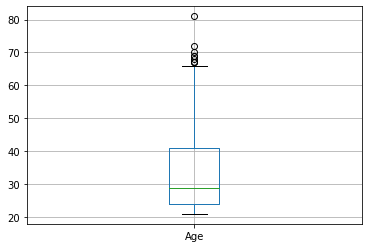

In [74]:
df[['Age']].boxplot()

In [75]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)

IQR = q3 - q1
m = df['Age'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

66.5
-1.5


In [76]:
df['Age'].loc[df['Age']>upper_tail]

123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

In [77]:
df['Age'].loc[df['Age']>upper_tail]=upper_tail

In [78]:
df['Age'].loc[df['Age']>upper_tail]

Series([], Name: Age, dtype: float64)

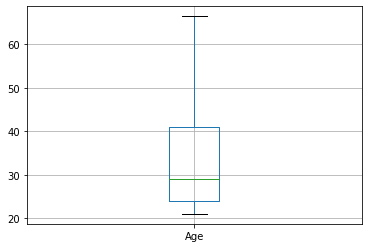

In [79]:
df[['Age']].boxplot()

## 8. Outcome

In [81]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

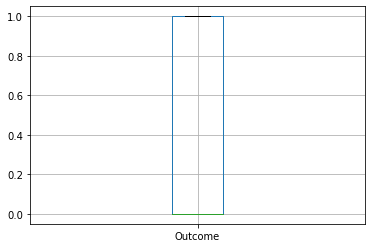

In [82]:
df[['Outcome']].boxplot()

## Model Building :

In [83]:
x = df.drop('Outcome',axis =1)
y = df['Outcome']

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 45)

In [85]:
model = LogisticRegression()

In [86]:
model.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_pred_test = model.predict(x_test)

y_pred_train = model.predict(x_train)

## Model Evaluation :

In [88]:
# for testing 

cnfx = confusion_matrix(y_test,y_pred_test)

clas = classification_report(y_test,y_pred_test)

acc = accuracy_score(y_test,y_pred_test)

print(cnfx)

print(clas)

print('Testing Accuracy :',round(acc,2))

[[86 18]
 [23 27]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       104
           1       0.60      0.54      0.57        50

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154

Testing Accuracy : 0.73


In [89]:
# for training 

cnfx = confusion_matrix(y_train,y_pred_train)

clas = classification_report(y_train,y_pred_train)

acc = accuracy_score(y_train,y_pred_train)

print(cnfx)

print(clas)

print('Training Accuracy :',round(acc,2))

[[353  43]
 [ 84 134]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       396
           1       0.76      0.61      0.68       218

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Training Accuracy : 0.79


## Dictionary of Columns :

In [90]:
column_names = x.columns
column_names

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [91]:
json_data = {'column_names':list(x.columns)}
json_data

{'column_names': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [92]:
# saving dictionary into json file

with open('Diabetes.json','w') as f :
    json.dump(json_data,f)

In [93]:
# saving model into pickle file

with open('Diabetes.pkl','wb') as f :
    pickle.dump(model,f)

## Single User Input Testing :

In [97]:
x.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000


In [98]:
Glucose = 148.000
BloodPressure = 50.000
SkinThickness = 35.000
Insulin = 0.000
BMI = 33.600
DiabetesPedigreeFunction = 0.627
Age = 50.000


In [99]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0.])

In [100]:
array = np.zeros(len(x.columns))
array

array([0., 0., 0., 0., 0., 0., 0.])

In [101]:
array[0] = Glucose
array[1] = BloodPressure
array[2] = SkinThickness
array[3] = Insulin
array[4] = BMI
array[5] = DiabetesPedigreeFunction
array[6] = Age
array

array([148.   ,  50.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ])

In [104]:
predict = model.predict([array])[0]

if predict == 1:
    
    print('Patient is Diabetic....')
    
else :
    
    print('Patient is Non-Diabetic....')

Patient is Diabetic....
